## DASK

In [1]:
import dask 

import dask.dataframe as dd
import dask.array as da
import pandas as pd
import numpy as np

In [2]:
from dask.multiprocessing import get
from multiprocessing import cpu_count

nCores = cpu_count()

In [3]:
nCores

4

# Dask Arrays

In [4]:
##numpy arrays
import numpy as np
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
##dask arrays
import dask.array as da
da.arange(100, chunks=5).compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

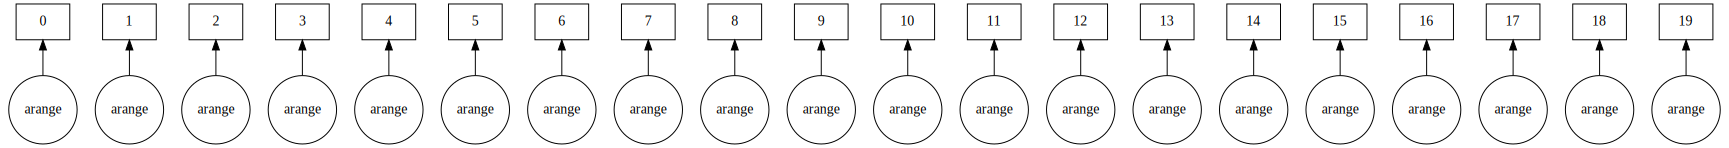

In [6]:
x = da.arange(100, chunks=(5,))
x.visualize('dask.svg')

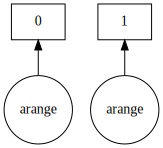

In [7]:
x = da.arange(10, chunks=(5,))
x.visualize('dask.svg')

In [8]:
x.chunks

((5, 5),)

### Convert NumPy array to Dask array

In [9]:
#numpy array
x = np.arange(1000)

#dask array
y = da.from_array(x, chunks=(100))

type(x), type(y)

(numpy.ndarray, dask.array.core.Array)

In [10]:
y.mean().compute()

499.5

In [11]:
x=da.arange(10, chunks=(5))
x

dask.array<arange, shape=(10,), dtype=int64, chunksize=(5,)>

In [12]:
x.compute()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
x=da.arange(11, chunks=(5))
x.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
x.chunks

((5, 5, 1),)

### Similar API

In [17]:
x=da.arange(11, chunks=(5)) #0 to 10
x.sum().compute()

55

In [18]:
x=da.arange(11, chunks=(5))
x.mean().compute()       #55/11

5.0

# Dask Dataframe

In [ ]:
import dask.dataframe as dd

In [19]:
#for the sake of comparision
import pandas as pd
%time df1=pd.read_csv("BF_train.csv")

CPU times: user 579 ms, sys: 97.2 ms, total: 676 ms
Wall time: 1.16 s


In [20]:
import dask.dataframe as dd
%time df = dd.read_csv('BF_train.csv')

CPU times: user 77.6 ms, sys: 0 ns, total: 77.6 ms
Wall time: 57.9 ms


## Similar API

In [21]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [23]:
df.isnull().sum().compute()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [24]:
df.Gender.value_counts().compute()

M    414259
F    135809
Name: Gender, dtype: int64